<a href="https://colab.research.google.com/github/blessey15/Ship-Truck-Binary-Classifier/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
idx = (np.logical_or(y_train==8, y_train==9)).reshape(X_train.shape[0])
print('Index Shape: {}'.format(idx.shape))
X_train = X_train[idx]
y_train= y_train[idx]
print('Filtered Images Shape: {}'.format(X_train.shape))

Index Shape: (50000,)
Filtered Images Shape: (10000, 32, 32, 3)


In [8]:
y_train[:5]

array([[9],
       [9],
       [8],
       [9],
       [9]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([9, 9, 8, 9, 9], dtype=uint8)

In [10]:
idx = (np.logical_or(y_test==8, y_test==9)).reshape(X_test.shape[0])
print('Index Shape: {}'.format(idx.shape))
X_test = X_test[idx]
y_test= y_test[idx]
print('Filtered Images Shape: {}'.format(X_test.shape))

Index Shape: (10000,)
Filtered Images Shape: (2000, 32, 32, 3)


In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes=["ship","truck"]
dic={8 : 'ship', 9 : 'truck'}

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    if y[index]==8:
      i=0
    else:
      i=1  
    plt.xlabel(classes[i])

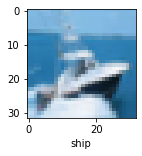

In [17]:
plot_sample(X_train, y_train, 2)

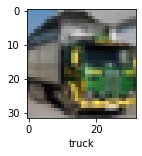

In [16]:
plot_sample(X_train, y_train, 3)

In [18]:
idx = (np.logical_or(y_test==8, y_test==9)).reshape(X_test.shape[0])
print('Index Shape: {}'.format(idx.shape))
X_test = X_test[idx]
y_test= y_test[idx]
print('Filtered Images Shape: {}'.format(X_test.shape))

Index Shape: (2000,)
Filtered Images Shape: (2000, 32, 32, 3)


In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
313/313 [==============================] - 14s 41ms/step - loss: 0.4549 - accuracy: 0.7880
Epoch 2/10
313/313 [==============================] - 13s 41ms/step - loss: 0.2822 - accuracy: 0.8815
Epoch 3/10
313/313 [==============================] - 12s 39ms/step - loss: 0.2323 - accuracy: 0.9051
Epoch 4/10
313/313 [==============================] - 12s 39ms/step - loss: 0.2054 - accuracy: 0.9181
Epoch 5/10
313/313 [==============================] - 12s 39ms/step - loss: 0.1902 - accuracy: 0.9243
Epoch 6/10
313/313 [==============================] - 12s 39ms/step - loss: 0.1677 - accuracy: 0.9364
Epoch 7/10
313/313 [==============================] - 12s 39ms/step - loss: 0.1619 - accuracy: 0.9376
Epoch 8/10
313/313 [==============================] - 12s 39ms/step - loss: 0.1483 - accuracy: 0.9427
Epoch 9/10
313/313 [==============================] - 12s 39ms/step - loss: 0.1342 - accuracy: 0.9488
Epoch 10/10
313/313 [==============================] - 12s 39ms/step - loss: 0.121

In [23]:
cnn.evaluate(X_test,y_test)

63/63 [==============================] - 1s 11ms/step - loss: 0.1666 - accuracy: 0.9350


[0.16656917333602905, 0.9350000023841858]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.0908043e-07, 1.2256714e-08, 7.1291701e-08, 2.9495570e-08,
        4.2530282e-08, 3.9015703e-08, 6.8405903e-08, 1.7957589e-08,
        9.5533365e-01, 4.4665765e-02],
       [3.9736228e-06, 3.7859860e-07, 1.2235412e-06, 8.0301498e-07,
        9.5207821e-07, 8.3773449e-07, 1.1872954e-06, 4.8319839e-07,
        9.6704280e-01, 3.2947395e-02],
       [2.0936811e-08, 4.5618793e-11, 6.5786143e-10, 4.1270590e-10,
        1.4662315e-09, 2.0471744e-09, 1.2694452e-09, 2.5135030e-10,
        3.5270903e-04, 9.9964726e-01],
       [8.1069187e-09, 1.3553847e-11, 2.0366701e-10, 1.4882789e-10,
        5.9066024e-10, 6.7155115e-10, 4.8470589e-10, 8.4453507e-11,
        8.0608606e-04, 9.9919397e-01],
       [3.8712710e-07, 1.8342700e-08, 8.5948251e-08, 5.6232007e-08,
        5.2994825e-08, 4.6656755e-08, 1.0649773e-07, 3.8298072e-08,
        9.8783255e-01, 1.2166561e-02]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 9, 9, 8]

In [26]:
y_test[:5]

array([8, 8, 9, 9, 8], dtype=uint8)

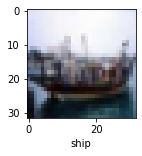

In [28]:
plot_sample(X_test, y_test,5)

In [31]:
dic[y_classes[5]]

'ship'

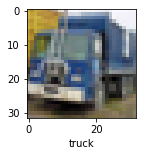

In [32]:
plot_sample(X_test, y_test,3)

In [33]:
dic[y_classes[3]]

'truck'

In [34]:
cnn.save('model.h5')
